# Importando y manipulando datos con Python

## Ejemplo 1: Importando datos de Internet

A menudo necesitamos darle seguimiento a algunos indicadores económicos. Este trabajo usualmente requiere:
* visitar el sitio de Internet del proveedor de datos, 
* buscar los indicadores requeridos, 
* descargar los datos (posiblemente en varios archivos separados), 
* copiar los datos a un solo archivo, 
* acomodar los datos de manera apropiada, 
* y solo después de que se hayan completado estas engorrosas tareas, graficarlos. 

Si este trabajo debe realizarse periódicamente entonces también se hace necesario documentar exhaustivamente cada uno de estos pasos, de manera que podamos replicarlos de manera exacta en un futuro. Sobra decir que, si estas tareas hay que realizarlas para múltiples indicadores, el trabajo termina demandando una cantidad de tiempo considerable y además es muy susceptible a errores.

Para facilitar este trabajo, podemos utilizar Python para descargar datos disponibles en Internet directamente, gracias a paquetes como [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html). Esto se hace fácilmente cuando los proveedores de datos proporcionan una API (interfaz de programa de aplicación) que especifica cómo un lenguaje como Python puede encontrar los datos deseados.

Vamos a ilustrar esto con un ejemplo. Supongamos que queremos datos recientes sobre el crecimiento económico para los países miembros de la CMCA. El Banco Mundial proporciona los datos pertinentes en su "World Database", que podemos leer con el módulo `wb` de `pandas_datareader`.

In [1]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt

pd.set_option('display.precision',2)
%matplotlib inline

Para poder descargar datos del Banco Mundial, primero necesitamos saber el código exacto del indicador que queremos leer. La primera vez que hagamos esta tarea no conoceremos este código, pero podemos buscarlo en el sitio web del Banco Mundial o más fácilmente desde python. Por ejemplo, para encontrar datos sobre el PIB real per cápita, ejecutamos la función `.search()`:

In [2]:
wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10411,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10413,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10415,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10416,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [3]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
10411,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
10413,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
10415,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
10416,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation..."


donde el punto seguido de un asterisco `.*` indica que cualquier texto en esa posición es una coincidencia. Esta función devuelve una tabla de datos con información sobre indicadores que coinciden con los criterios de búsqueda. En la línea anterior, usamos el código `.iloc[:,:2]` para que Python solo imprima las dos primeras columnas de esa tabla.

Después de ejecutar esa búsqueda, elegimos el `'NY.GDP.PCAP.KD'`, cuya descripción es "GDP per capita (constant 2010 US\$)". Definimos una variable con una lista de códigos de país de los países del CMCA:

In [4]:
paises = ['CR', 'DO', 'GT', 'HN', 'NI', 'SV']

y procedemos a leer datos desde 1991:

In [5]:
datos = wb.download(indicator='NY.GDP.PCAP.KD',
                    country=paises,start=1991, end=2019)

datos.head(7)

NY.GDP.PCAP.KD
country    year                
Costa Rica 2019        12735.09
           2018        12573.96
           2017        12375.92
           2016        12004.67
           2015        11642.78
           2014        11355.33
           2013        11090.09

In [6]:
datos

NY.GDP.PCAP.KD
country     year                
Costa Rica  2019        12735.09
            2018        12573.96
            2017        12375.92
            2016        12004.67
            2015        11642.78
...                          ...
El Salvador 1995         2839.21
            1994         2743.37
            1993         2654.52
            1992         2542.90
            1991         2409.03

[174 rows x 1 columns]

También es posible leer datos de más de un indicador en una sola llamada a la función `wb.download()`, escribiendo sus códigos en una lista (tal como lo hicimos para leer datos de los seis países a la vez). En cualquier caso, obtenemos una tabla de datos en formato de panel, donde cada columna corresponde a uno de los indicadores.

Para nuestro ejemplo en particular, donde solo leemos un indicador, sería útil si la tabla estuviera organizada de manera que cada fila corresponda a un año y cada columna a un país. Podemos lograrlo con esta instrucción:

In [7]:
paises2 = {'Costa Rica':'CR', 
           'Dominican Republic':'DO',
           'El Salvador':'SV',
           'Guatemala':'GT',
           'Honduras':'HN',
           'Nicaragua':'NI'}

In [8]:
datos.unstack('country')

NY.GDP.PCAP.KD                                                    \
country     Costa Rica Dominican Republic El Salvador Guatemala Honduras   
year                                                                       
1991           6018.86            2774.25     2409.03   2758.68  1622.32   
1992           6403.78            3028.11     2542.90   2817.23  1672.92   
1993           6683.84            3191.60     2654.52   2854.13  1732.13   
1994           6811.11            3216.11     2743.37   2896.22  1687.46   
1995           6920.58            3340.04     2839.21   2965.89  1741.67   
1996           6846.36            3480.27     2831.39   2981.12  1724.17   
1997           7053.14            3727.80     2891.60   3038.71  1752.48   
1998           7389.05            3915.14     2941.94   3115.98  1764.41   
1999           7538.89            4083.64     2981.34   3160.08  1703.04   
2000           7678.49            4209.41     2992.90   3195.39  1777.92   
2001           7805.31            4249.10     2999.32   3192.31  1778.35   
2002           7940.43            4375.79     3028.55   3239.57  1797.89   
2003           8157.65            4255.77     3059.57   3250.84  1832.81   
2004           8395.40            4304.77     3071.55   3282.32  1899.81   
2005           8606.33            4647.04     3140.03   3320.16  1967.22   
2006           9109.53            5006.55     3261.76   3427.68  2048.27   
2007           9725.38            5308.63     3308.05   3573.60  2126.49   
2008          10052.68            5409.95     3364.10   3620.83  2168.59   
2009           9837.88            5393.47     3280.02   3570.30  2071.77   
2010          10236.98            5771.92     3334.93   3606.43  2106.00   
2011          10559.21            5881.14     3447.35   3688.87  2144.70   
2012          10945.04            5969.35     3528.87   3731.68  2191.89   
2013          11090.09            6187.28     3591.43   3802.15  2212.66   
2014          11355.33            6547.31     3636.01   3903.06  2240.33   
2015          11642.78            6921.52     3705.58   3994.64  2286.20   
2016          12004.67            7300.03     3781.38   4034.16  2334.75   
2017          12375.92            7556.85     3846.97   4091.27  2406.75   
2018          12573.96            7997.76     3920.53   4160.07  2457.97   
2019          12735.09            8314.34     3993.53   4254.04  2482.12   

                   
country Nicaragua  
year               
1991      1227.53  
1992      1204.90  
1993      1173.81  
1994      1187.31  
1995      1232.32  
1996      1285.79  
1997      1312.96  
1998      1338.68  
1999      1409.79  
2000      1444.95  
2001      1465.74  
2002      1455.87  
2003      1472.04  
2004      1529.19  
2005      1573.05  
2006      1616.08  
2007      1674.94  
2008      1708.82  
2009      1630.09  
2010      1679.04  
2011      1761.21  
2012      1850.70  
2013      1916.28  
2014      1981.75  
2015      2049.85  
2016      2115.93  
2017      2185.91  
2018      2086.03  
2019      1984.82

In [9]:
datos.unstack('country').columns

MultiIndex([('NY.GDP.PCAP.KD',         'Costa Rica'),
            ('NY.GDP.PCAP.KD', 'Dominican Republic'),
            ('NY.GDP.PCAP.KD',        'El Salvador'),
            ('NY.GDP.PCAP.KD',          'Guatemala'),
            ('NY.GDP.PCAP.KD',           'Honduras'),
            ('NY.GDP.PCAP.KD',          'Nicaragua')],
           names=[None, 'country'])

In [10]:
datos.unstack('country')

NY.GDP.PCAP.KD                                                    \
country     Costa Rica Dominican Republic El Salvador Guatemala Honduras   
year                                                                       
1991           6018.86            2774.25     2409.03   2758.68  1622.32   
1992           6403.78            3028.11     2542.90   2817.23  1672.92   
1993           6683.84            3191.60     2654.52   2854.13  1732.13   
1994           6811.11            3216.11     2743.37   2896.22  1687.46   
1995           6920.58            3340.04     2839.21   2965.89  1741.67   
1996           6846.36            3480.27     2831.39   2981.12  1724.17   
1997           7053.14            3727.80     2891.60   3038.71  1752.48   
1998           7389.05            3915.14     2941.94   3115.98  1764.41   
1999           7538.89            4083.64     2981.34   3160.08  1703.04   
2000           7678.49            4209.41     2992.90   3195.39  1777.92   
2001           7805.31            4249.10     2999.32   3192.31  1778.35   
2002           7940.43            4375.79     3028.55   3239.57  1797.89   
2003           8157.65            4255.77     3059.57   3250.84  1832.81   
2004           8395.40            4304.77     3071.55   3282.32  1899.81   
2005           8606.33            4647.04     3140.03   3320.16  1967.22   
2006           9109.53            5006.55     3261.76   3427.68  2048.27   
2007           9725.38            5308.63     3308.05   3573.60  2126.49   
2008          10052.68            5409.95     3364.10   3620.83  2168.59   
2009           9837.88            5393.47     3280.02   3570.30  2071.77   
2010          10236.98            5771.92     3334.93   3606.43  2106.00   
2011          10559.21            5881.14     3447.35   3688.87  2144.70   
2012          10945.04            5969.35     3528.87   3731.68  2191.89   
2013          11090.09            6187.28     3591.43   3802.15  2212.66   
2014          11355.33            6547.31     3636.01   3903.06  2240.33   
2015          11642.78            6921.52     3705.58   3994.64  2286.20   
2016          12004.67            7300.03     3781.38   4034.16  2334.75   
2017          12375.92            7556.85     3846.97   4091.27  2406.75   
2018          12573.96            7997.76     3920.53   4160.07  2457.97   
2019          12735.09            8314.34     3993.53   4254.04  2482.12   

                   
country Nicaragua  
year               
1991      1227.53  
1992      1204.90  
1993      1173.81  
1994      1187.31  
1995      1232.32  
1996      1285.79  
1997      1312.96  
1998      1338.68  
1999      1409.79  
2000      1444.95  
2001      1465.74  
2002      1455.87  
2003      1472.04  
2004      1529.19  
2005      1573.05  
2006      1616.08  
2007      1674.94  
2008      1708.82  
2009      1630.09  
2010      1679.04  
2011      1761.21  
2012      1850.70  
2013      1916.28  
2014      1981.75  
2015      2049.85  
2016      2115.93  
2017      2185.91  
2018      2086.03  
2019      1984.82

In [11]:
GDP = datos.unstack('country')['NY.GDP.PCAP.KD']
GDP

country,Costa Rica,Dominican Republic,El Salvador,Guatemala,Honduras,Nicaragua
year,,,,,,
1991,6018.86,2774.25,2409.03,2758.68,1622.32,1227.53
1992,6403.78,3028.11,2542.90,2817.23,1672.92,1204.90
1993,6683.84,3191.60,2654.52,2854.13,1732.13,1173.81
1994,6811.11,3216.11,2743.37,2896.22,1687.46,1187.31
1995,6920.58,3340.04,2839.21,2965.89,1741.67,1232.32
1996,6846.36,3480.27,2831.39,2981.12,1724.17,1285.79
1997,7053.14,3727.80,2891.60,3038.71,1752.48,1312.96
1998,7389.05,3915.14,2941.94,3115.98,1764.41,1338.68
1999,7538.89,4083.64,2981.34,3160.08,1703.04,1409.79


In [12]:
GDP.rename(columns=paises2, inplace=True)
GDP

country,CR,DO,SV,GT,HN,NI
year,,,,,,
1991,6018.86,2774.25,2409.03,2758.68,1622.32,1227.53
1992,6403.78,3028.11,2542.90,2817.23,1672.92,1204.90
1993,6683.84,3191.60,2654.52,2854.13,1732.13,1173.81
1994,6811.11,3216.11,2743.37,2896.22,1687.46,1187.31
1995,6920.58,3340.04,2839.21,2965.89,1741.67,1232.32
1996,6846.36,3480.27,2831.39,2981.12,1724.17,1285.79
1997,7053.14,3727.80,2891.60,3038.71,1752.48,1312.96
1998,7389.05,3915.14,2941.94,3115.98,1764.41,1338.68
1999,7538.89,4083.64,2981.34,3160.08,1703.04,1409.79


In [13]:
GDP.index = pd.period_range(start=GDP.index[0], periods=len(GDP.index),freq='A')

Una vez que los datos se organizan de esta manera, es muy fácil calcular el crecimiento para todos los países en un solo paso:

In [14]:
GDP.tail(6)

country,CR,DO,SV,GT,HN,NI
2014,11355.33,6547.31,3636.01,3903.06,2240.33,1981.75
2015,11642.78,6921.52,3705.58,3994.64,2286.20,2049.85
2016,12004.67,7300.03,3781.38,4034.16,2334.75,2115.93
2017,12375.92,7556.85,3846.97,4091.27,2406.75,2185.91
2018,12573.96,7997.76,3920.53,4160.07,2457.97,2086.03
2019,12735.09,8314.34,3993.53,4254.04,2482.12,1984.82


In [15]:
GROWTH = 100 * GDP.dropna().pct_change()
GROWTH.tail()

country,CR,DO,SV,GT,HN,NI
2015,2.53,5.72,1.91,2.35,2.05,3.44
2016,3.11,5.47,2.05,0.99,2.12,3.22
2017,3.09,3.52,1.73,1.42,3.08,3.31
2018,1.60,5.83,1.91,1.68,2.13,-4.57
2019,1.28,3.96,1.86,2.26,0.98,-4.85


o para generar una tabla de datos formateada para ser incluida en un documento $\LaTeX$

In [16]:
GROWTH.tail(6).round(2).to_latex('micuadro.tex')

En la última instrucción, la parte `.tail(6)` indica que solo queremos las últimas seis observaciones, mientras que la parte `.to_latex('micuadro.tex')` exporta esa tabla a un archivo llamado *micuadro.tex*, que luego puede incluirse en un documento. El resultado de este código es

In [17]:
print(open('micuadro.tex').read())

\begin{tabular}{lrrrrrr}
\toprule
country &    CR &    DO &    SV &    GT &    HN &    NI \\
\midrule
2014 &  2.39 &  5.82 &  1.24 &  2.65 &  1.25 &  3.42 \\
2015 &  2.53 &  5.72 &  1.91 &  2.35 &  2.05 &  3.44 \\
2016 &  3.11 &  5.47 &  2.05 &  0.99 &  2.12 &  3.22 \\
2017 &  3.09 &  3.52 &  1.73 &  1.42 &  3.08 &  3.31 \\
2018 &  1.60 &  5.83 &  1.91 &  1.68 &  2.13 & -4.57 \\
2019 &  1.28 &  3.96 &  1.86 &  2.26 &  0.98 & -4.85 \\
\bottomrule
\end{tabular}



Finalmente, graficamos los resultados. Es posible mejorar el aspecto estético de esta figura, por ejemplo, cambiando la posición de la leyenda. Tales mejoras no se presentan aquí por consideraciones de espacio.

In [18]:
GROWTH.head()

country,CR,DO,SV,GT,HN,NI
1991,NaN,NaN,NaN,NaN,NaN,NaN
1992,6.40,9.15,5.56,2.12,3.12,-1.84
1993,4.37,5.40,4.39,1.31,3.54,-2.58
1994,1.90,0.77,3.35,1.47,-2.58,1.15
1995,1.61,3.85,3.49,2.41,3.21,3.79


In [19]:
paises

['CR', 'DO', 'GT', 'HN', 'NI', 'SV']

In [20]:
plt.style.use('seaborn');
GROWTH = GROWTH[paises]

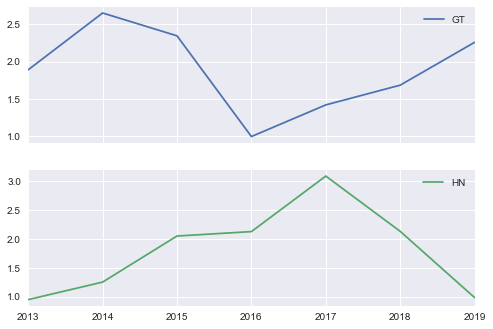

In [21]:
GROWTH[['GT','HN']]['2013':].plot(subplots=True)
plt.savefig('growth.pdf', bbox_inches='tight')

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

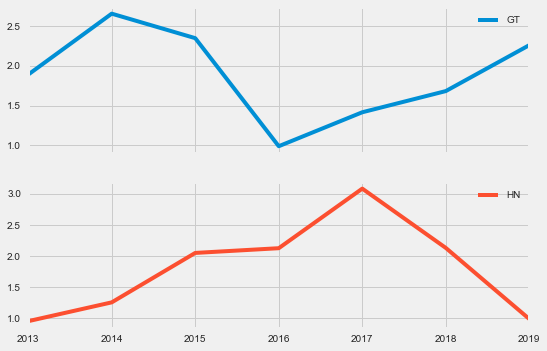

In [22]:
plt.style.use('fivethirtyeight');
GROWTH.columns = paises
GROWTH[['GT','HN']]['2013':].plot(subplots=True)

También es posible trazar cada una de las series de tiempo en un subgráfico separado, con la instrucción

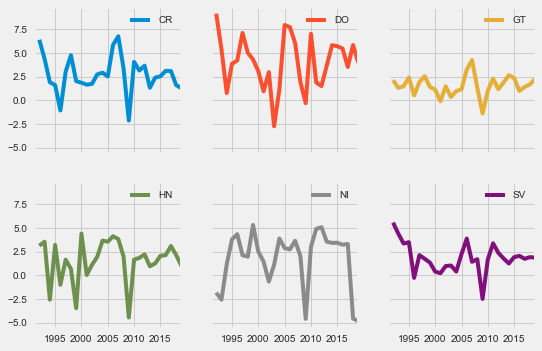

In [23]:
GROWTH.plot(subplots=True, layout=[2,3], sharey=True);
#plt.savefig('growth-subplots.pdf', bbox_inches='tight')

donde hemos especificado que cada serie de tiempo debe trazarse por separado (`subplots=True`), organizarse en dos filas y tres columnas (`layout=[2,3]`), y todos los subgráficos deben tener el mismo eje "y" (`sharey=True`, para facilitar las comparaciones de países).

Para ver cuáles estilos de gráficos están disponibles

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Ejemplo 2: Estimaciones econométricas

El paquete `statsmodels` de Python permite la estimación de muchos tipos de modelos econométricos, aunque no tantos como se pueden estimar usando R. Una ilustración simple es la estimación de una función de consumo keynesiana,
\begin{equation*}
\ln(c_t) = \beta_0 + \beta_1 \ln(y_t) + \epsilon_t
\end{equation*}

donde $c_t$ representa consumo, $y_t$ ingreso, $\epsilon$ un shock estocástico. En este caso $\beta_1$ corresponde a la elasticidad ingreso del consumo.

Al igual que en el ejemplo anterior, usaremos `pandas-datareader` para importar datos de Internet. En este ejemplo, también importamos la función `log()` del paquete `numpy` para calcular el logaritmo de los datos, así como el módulo `formula.api` de `statsmodels` para estimar el modelo.

In [25]:
import pandas_datareader.data as web
from numpy import log
import statsmodels.formula.api as smf

Una vez hecho esto, estamos listos para importar datos. En este ejemplo, utilizamos datos trimestrales sobre consumo y producción en los Estados Unidos, disponibles en [FRED](https://fred.stlouisfed.org/), una base de datos del Banco de la Reserva Federal de Saint Louis. Para “consumo” usamos la serie “PCEC” (Personal Consumption Expenditures), y para “ingreso” usamos “GDP” (Gross Domestic Product).

In [26]:
usdata = web.DataReader(['PCEC','GDP'],'fred', 1947, 2018)

In [27]:
usdata.tail()

,PCEC,GDP
DATE,,
2017-01-01,13046.44,19153.91
2017-04-01,13144.40,19322.92
2017-07-01,13268.15,19558.69
2017-10-01,13497.45,19882.97
2018-01-01,13667.43,20143.72


Después de ejecutar esta instrucción, la variable `usdata` apunta a una tabla de datos `pandas`, en la que cada columna corresponde a una variable y cada fila a un cuarto.

Ahora estimamos el modelo por mínimos cuadrados ordinarios (`.ols()`) e imprimimos un resumen de los resultados

<AxesSubplot:xlabel='DATE'>

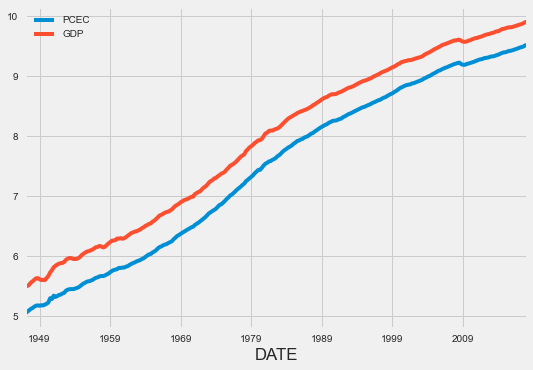

In [28]:
log(usdata).plot()

In [29]:
mod = smf.ols('PCEC ~ GDP', log(usdata)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.309e+05
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:32:35   Log-Likelihood:                 592.46
No. Observations:                 285   AIC:                            -1181.
Df Residuals:                     283   BIC:                            -1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6745      0.010    -64.899      0.000      -0.695      -0.654
GDP            1.0273      0.001    794.300      0.000       1.025       1.030
==============================================================================
Omnibus:                       51.744   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.528
Skew:                           1.022   Prob(JB):                     1.62e-19
Kurtosis:                       4.764   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observe que la función `.ols()` toma dos argumentos, la fórmula que especifica el modelo y el nombre de la tabla de datos que contiene las variables. En este bloque de código, especificamos los datos como `log(usdata)`, que le dice a Python que queremos el logaritmo de los datos, lo que nos ahorra la tarea de generar otra tabla de datos con los datos transformados de antemano (como sería necesario en, para ejemplo, Stata).

Alternativamente, esa línea también se puede escribir como
```
mod = smf.ols('log(PCEC) ~ log(GDP)', usdata).fit()
```
lo cual es conveniente en casos donde no todas las variables deben ser transformadas.

Como se espera en una regresión de series de tiempo de tendencia, el estadístico $R^2$ es muy cercano a uno, y el estadístico de Durbin-Watson apunta a la alta posibilidad de autocorrelación en los residuos. Este documento no pretende ser una guía de mejores prácticas en econometría, pero consideremos un último modelo en el que el crecimiento del consumo depende del crecimiento del ingreso:

\begin{equation*}
\Delta\ln(c_t) = \beta_0 + \beta_1 \Delta \ln(y_t) + \epsilon_t
\end{equation*}

que estimamos en Python con

In [30]:
smf.ols('PCEC ~ GDP', log(usdata).diff()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCEC   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.49e-43
Time:                        16:32:35   Log-Likelihood:                 1011.9
No. Observations:                 284   AIC:                            -2020.
Df Residuals:                     282   BIC:                            -2012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0062      0.001      8.668      0.000       0.005       0.008
GDP            0.6167      0.037     16.515      0.000       0.543       0.690
==============================================================================
Omnibus:                      102.779   Durbin-Watson:                   2.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.030
Skew:                          -1.129   Prob(JB):                    3.68e-239
Kurtosis:                      12.364   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notamos que ahora el $R^2$ ya no está cerca de uno, y que la estadística de Durbin-Watson está más cerca de 2.0, lo que indica falta de autocorrelación.

Con los resultados disponibles, podríamos predecir que un aumento de un punto porcentual (p.p.) en el crecimiento del PIB conduciría a un 0.618 p.p. aumento en el crecimiento del consumo. Sin embargo, dado que la muestra de datos cubre un período tan largo (casi 70 años de observación trimestral), es razonable preguntarse si los parámetros en este modelo son constantes, dado que podrían haber ocurrido varios cambios estructurales a lo largo de estos años. Una forma de evaluar dicha posibilidad es estimar el modelo con una muestra continua. En particular, vamos a estimar este modelo con 24 ventanas trimestrales de ventana móvil, cambiando la muestra en un cuarto en cada paso.

En este caso, dado que vamos a necesitar datos de crecimiento muchas veces, es más eficiente calcular los datos de crecimiento solo una vez y almacenarlos en una variable de 'crecimiento'. Con el código `[1:]` estamos eliminando la primera observación, que perdemos cuando calculamos la diferencia de primer orden `.diff()`. Además, usamos la propiedad `.shape` de la tabla para averiguar cuántas observaciones tenemos` T`, y luego establecemos el rango de ventana en observaciones `h = 24`:

In [31]:
growth = (100*log(usdata).diff())[1:]
T, nvar = growth.shape
h = 40

In [32]:
T /4

71.0

Para facilitar el siguiente paso, definimos la función `window_beta1`, que toma como único argumento el número de la última observación que se incluirá en la estimación, y devuelve el valor del coeficiente estimado del PIB

In [33]:
def window_beta1(k):
    submuestra = growth[k-h:k]
    return smf.ols('PCEC~GDP', submuestra).fit().params['GDP']

In [34]:
window_beta1(81)

0.4146020832731192

Con esto, estamos listos para estimar el modelo muchas veces, agregando los resultados a la tabla de `growth` como el “indicador” `beta1`. Al graficar los resultados, obtenemos la siguiente figura, donde vemos claramente que el efecto del crecimiento del PIB en el crecimiento del consumo es bastante inestable y, por lo tanto, las predicciones hechas con el modelo simple podrían ser muy pobres.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


<AxesSubplot:xlabel='DATE'>

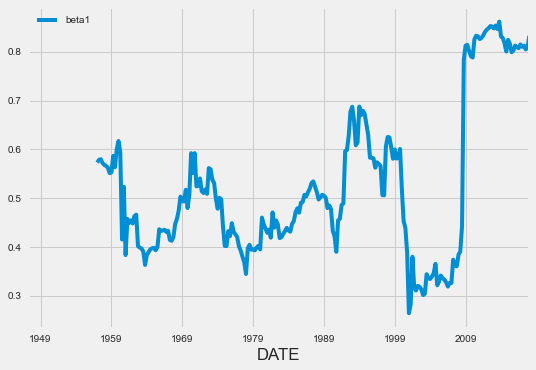

In [35]:
growth.loc[h-1:,'beta1'] = [window_beta1(k) for k in range(h,T+1)]
growth[['beta1']].plot()
#plt.savefig('dynamic-beta.pdf', bbox_inches='tight')

## Referencias

* Romero-Aguilar, Randall (2017). **[Python para economistas](http://www.secmca.org/NOTAS_ECONOMICAS/articulo93NOV2017.pdf)**. Nota Económica Regionales N0.93, diciembre. SECMCA. 